# 分析DEMO② CCLI TOP 100のテキスト分析

+ 単語頻度の比較

In [1]:
setwd('C:/Users/satoc/Desktop/2020/関西学院大学レクチャー/')

library('dplyr')
library('stringr')

# install.packages('tidytext')
library('tidytext')

#install.packages('SnowballC')
library('SnowballC')



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidytext' was built under R version 4.0.3"
Warning message:
"package 'SnowballC' was built under R version 4.0.3"


In [2]:
df = read.delim('./data/ccli100.tsv', sep='\t', stringsAsFactors=F, encoding='utf8', header=T)


In [3]:
df %>% head(1)

,id,title,position,type,lyric
,<int>,<chr>,<int>,<chr>,<chr>
1,1,Living Hope,1,Verse,How great the chasm that lay between us How high the mountain I could not climb In desperation I turned to heaven And spoke Your name into the night Then through the darkness Your loving-kindness Tore through the shadows of my soul The work is finished the end is written Jesus Christ my living hope


In [4]:
# convert to tibble
df = df %>% tibble()


In [5]:
# id 42 is not English
df = df %>% filter(id != 42)

In [6]:
# tokenization (without stemming, lemmatization)
tokens = df %>% unnest_tokens(word, lyric)

In [8]:
tokens %>% print(n=10)

# A tibble: 12,795 x 5
      id title       position type  word   
   <int> <chr>          <int> <chr> <chr>  
 1     1 Living Hope        1 Verse how    
 2     1 Living Hope        1 Verse great  
 3     1 Living Hope        1 Verse the    
 4     1 Living Hope        1 Verse chasm  
 5     1 Living Hope        1 Verse that   
 6     1 Living Hope        1 Verse lay    
 7     1 Living Hope        1 Verse between
 8     1 Living Hope        1 Verse us     
 9     1 Living Hope        1 Verse how    
10     1 Living Hope        1 Verse high   
# ... with 12,785 more rows


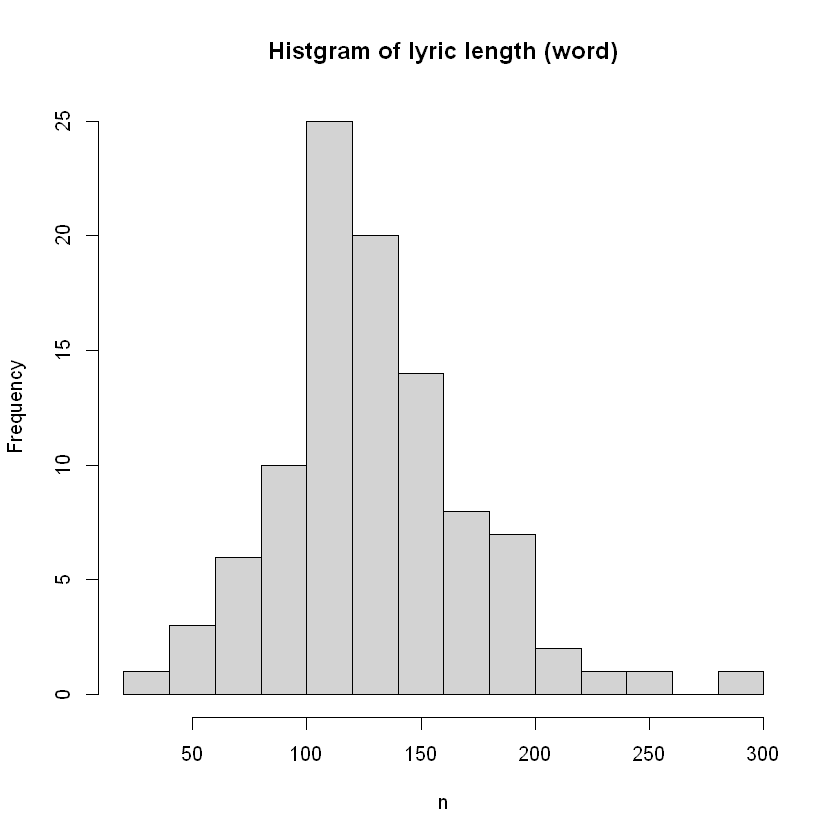

In [9]:
tokens %>% count(id) %>% with(hist(n, breaks=10, main='Histgram of lyric length (word)'))

In [10]:
tokens %>% count(word, sort=T) %>% print(n=10)

# A tibble: 1,483 x 2
   word      n
   <chr> <int>
 1 the     646
 2 you     444
 3 i       380
 4 and     340
 5 my      323
 6 is      282
 7 in      266
 8 of      257
 9 to      245
10 your    223
# ... with 1,473 more rows


In [12]:
# set stop words
my_stop_words = c('the', 'and', 'is', 'in', 'of', 'for', 'are', 'a', 'to', 'be',
                  'that', 'with', 'who', 'it', 'am', 'let', 'what', 'on', 'see', 
                  'how', 'this', 'has', 'not', 'from', 'have', 'through')

In [13]:
tokens %>% filter(!word %in% my_stop_words) %>% count(word, sort=T) %>% print(n=50)

# A tibble: 1,457 x 2
   word        n
   <chr>   <int>
 1 you       444
 2 i         380
 3 my        323
 4 your      223
 5 me        175
 6 all       148
 7 god       139
 8 will      138
 9 jesus     122
10 lord      122
11 our       110
12 he        102
13 love       95
14 his        90
15 name       83
16 us         71
17 sing       67
18 we         64
19 christ     62
20 oh         62
21 when       58
22 king       56
23 forever    52
24 heart      51
25 praise     51
26 life       47
27 great      46
28 never      46
29 good       44
30 glory      42
31 one        42
32 come       41
33 worship    41
34 now        40
35 as         39
36 you're     39
37 him        38
38 no         38
39 know       37
40 grace      36
41 hope       36
42 i'll       36
43 but        34
44 can        34
45 o          34
46 was        34
47 so         33
48 i'm        32
49 things     32
50 day        31
# ... with 1,407 more rows


In [14]:
# built-in stop_words 
data("stop_words")

In [15]:
?stop_words

stop_words {tidytext},R Documentation


In [16]:
tokens %>% anti_join(stop_words) %>% count(word, sort=T) %>% print(n=10)

Joining, by = "word"



# A tibble: 1,174 x 2
   word        n
   <chr>   <int>
 1 god       139
 2 jesus     122
 3 lord      122
 4 love       95
 5 sing       67
 6 christ     62
 7 king       56
 8 forever    52
 9 heart      51
10 praise     51
# ... with 1,164 more rows


In [17]:
# stemming
stemmed = tokens %>% mutate_at('word', funs(wordStem((.), language='en')))

Warning message:
"`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


In [18]:
stemmed %>% anti_join(stop_words) %>% count(word, sort=T) %>% print(n=20)

Joining, by = "word"



# A tibble: 934 x 2
   word        n
   <chr>   <int>
 1 god       140
 2 jesus     122
 3 lord      122
 4 love      100
 5 sing       75
 6 heart      65
 7 king       64
 8 christ     62
 9 prais      56
10 forev      52
11 life       49
12 day        46
13 glori      42
14 worship    41
15 you'r      39
16 hope       37
17 grace      36
18 holi       34
19 soul       33
20 lift       32
# ... with 914 more rows


Joining, by = "word"



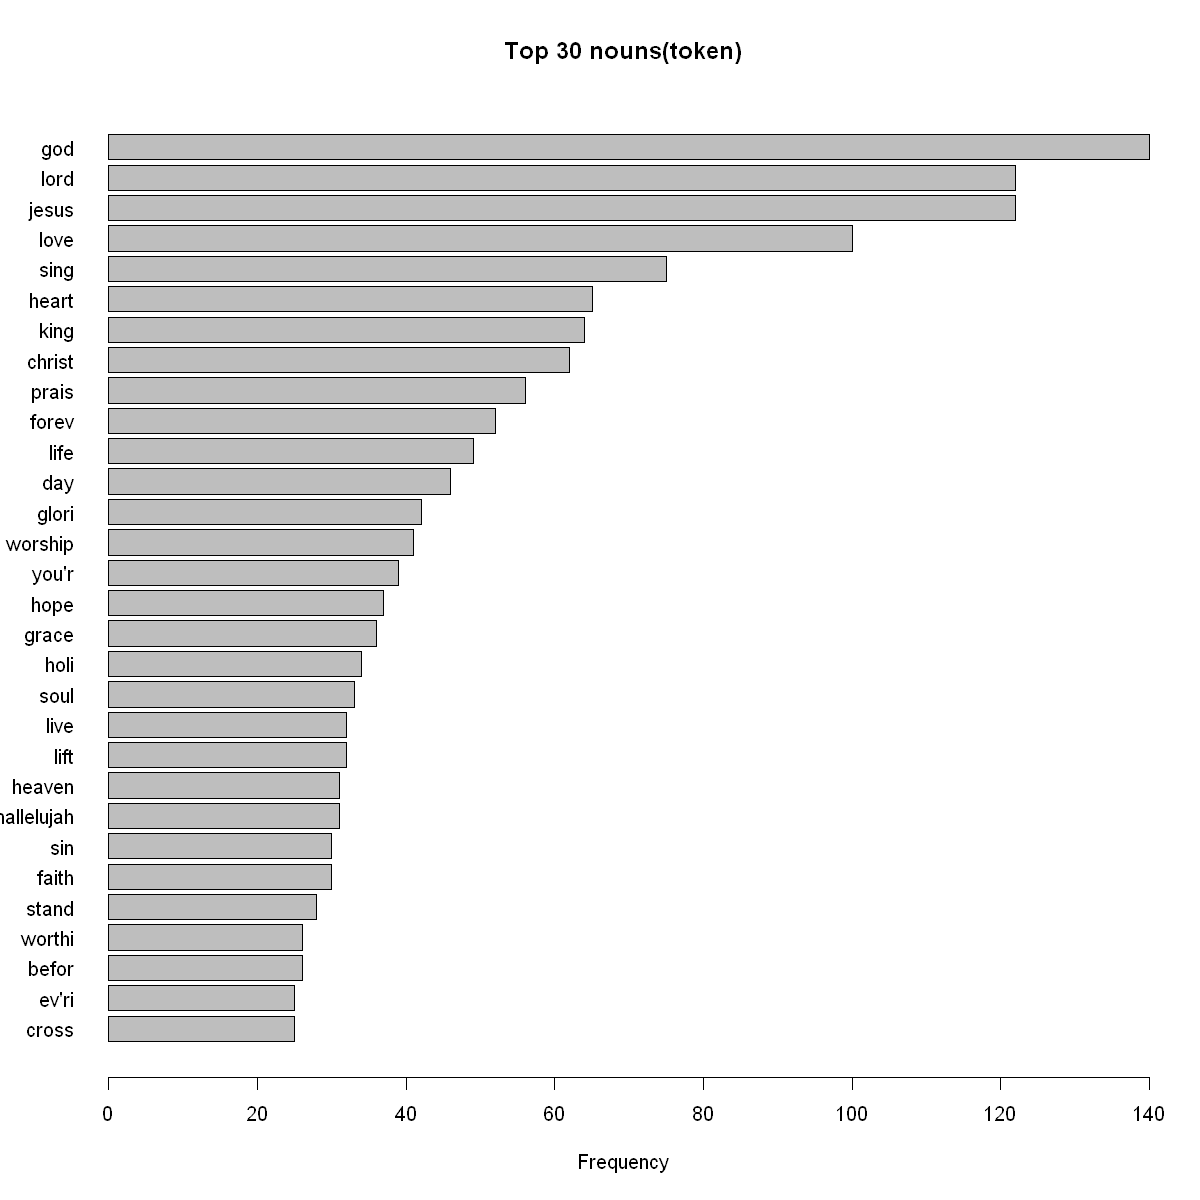

In [19]:
options(repr.plot.width=10, repr.plot.height=10)
stemmed %>% anti_join(stop_words) %>% count(word, sort=T) %>% head(30) %>% arrange(n) %>%
    with(barplot(n, names.arg = word, horiz=T, las=1, main='Top 30 nouns(token)', xlab='Frequency', cex.names = 1))

In [20]:
verse = stemmed %>% filter(type == 'Verse') %>% anti_join(stop_words) %>% count(word, sort=T) 
chorus = stemmed %>% filter(type == 'Chorus') %>% anti_join(stop_words) %>% count(word, sort=T) 

Joining, by = "word"

Joining, by = "word"



In [21]:
merged = merge(verse, chorus, all=T, by='word')

colnames(merged) = c('word', 'verse', 'chorus')
# fill NA values with 0 
merged[is.na(merged)] = 0

In [22]:
merged %>% head()

,word,verse,chorus
,<chr>,<dbl>,<dbl>
1,abandon,0,1
2,abid,1,0
3,abl,1,3
4,abound,2,0
5,abov,13,6
6,abund,1,0


In [23]:
merged['total'] = merged$verse + merged$chorus

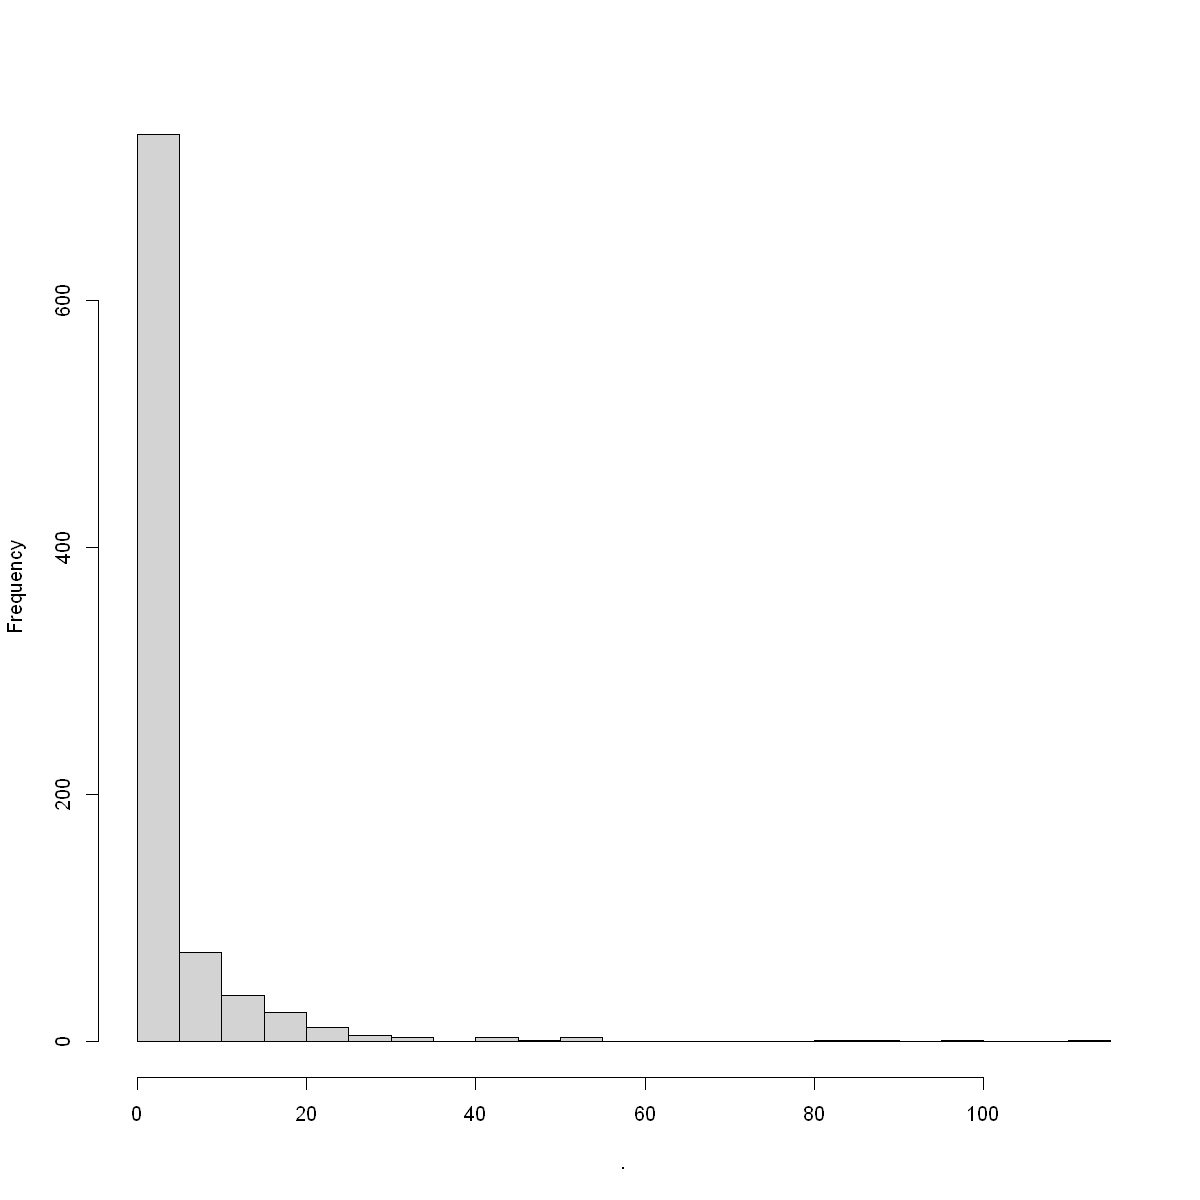

In [24]:
merged$total %>% hist(breaks=30, main='')

In [25]:
selected = merged %>% arrange(desc(total)) %>% head(50)

In [26]:
selected %>% head(10)

,word,verse,chorus,total
,<chr>,<dbl>,<dbl>,<dbl>
1,god,45,67,112
2,lord,64,35,99
3,jesus,55,35,90
4,love,55,30,85
5,christ,37,18,55
6,king,37,15,52
7,heart,37,14,51
8,prais,24,23,47
9,forev,20,22,42


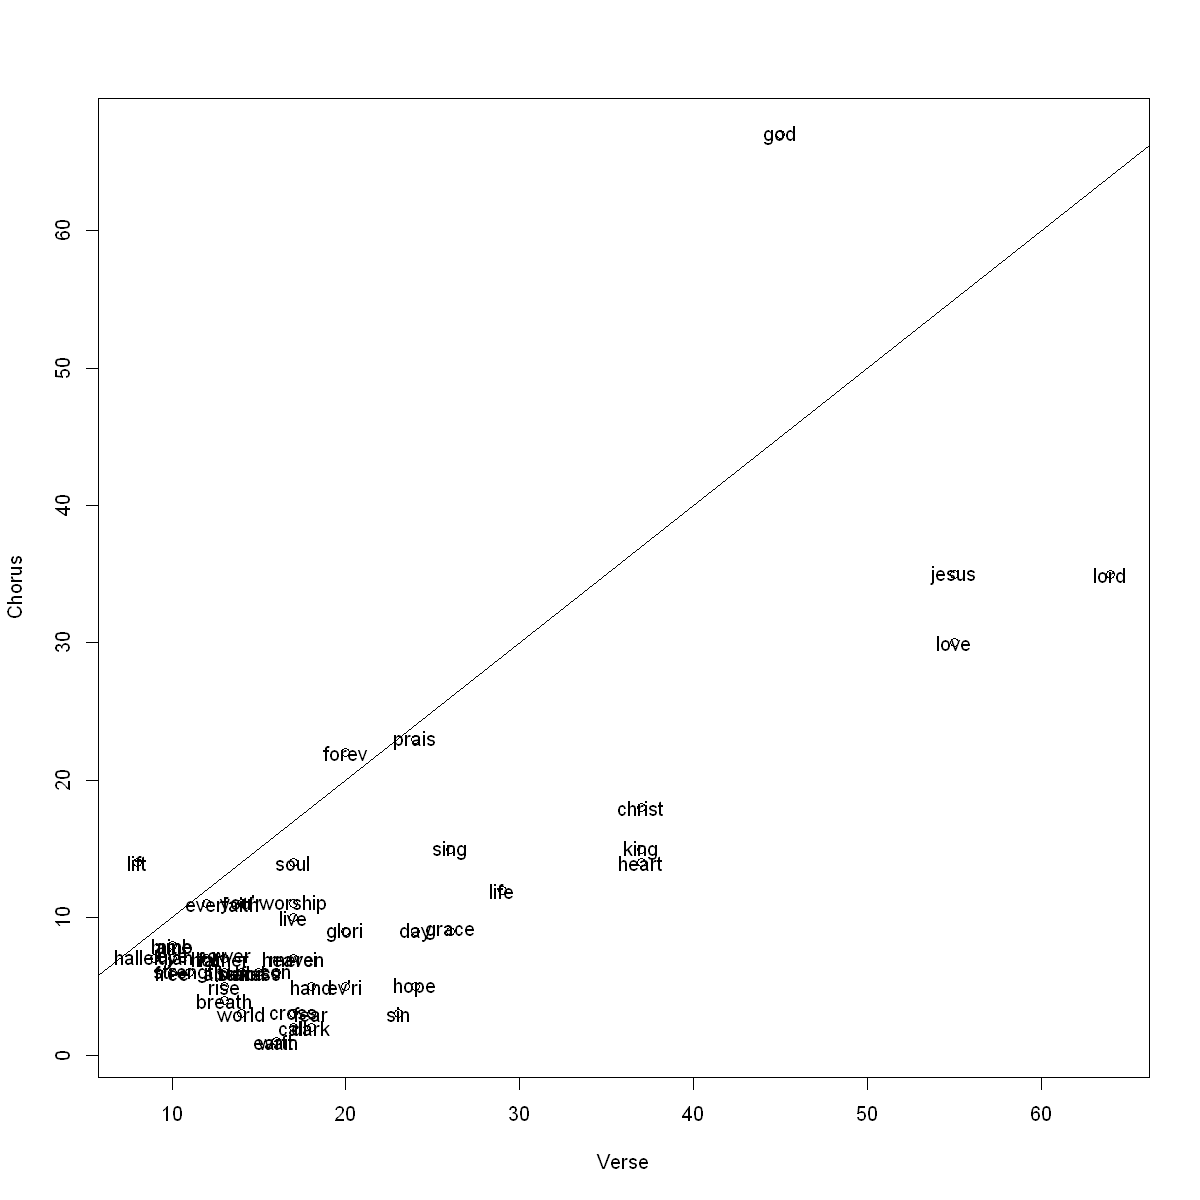

In [27]:
plot(selected$verse, selected$chorus, xlab='Verse', ylab='Chorus')
text(selected$verse, selected$chorus, labels=selected$word)
abline(a=0, b=1)


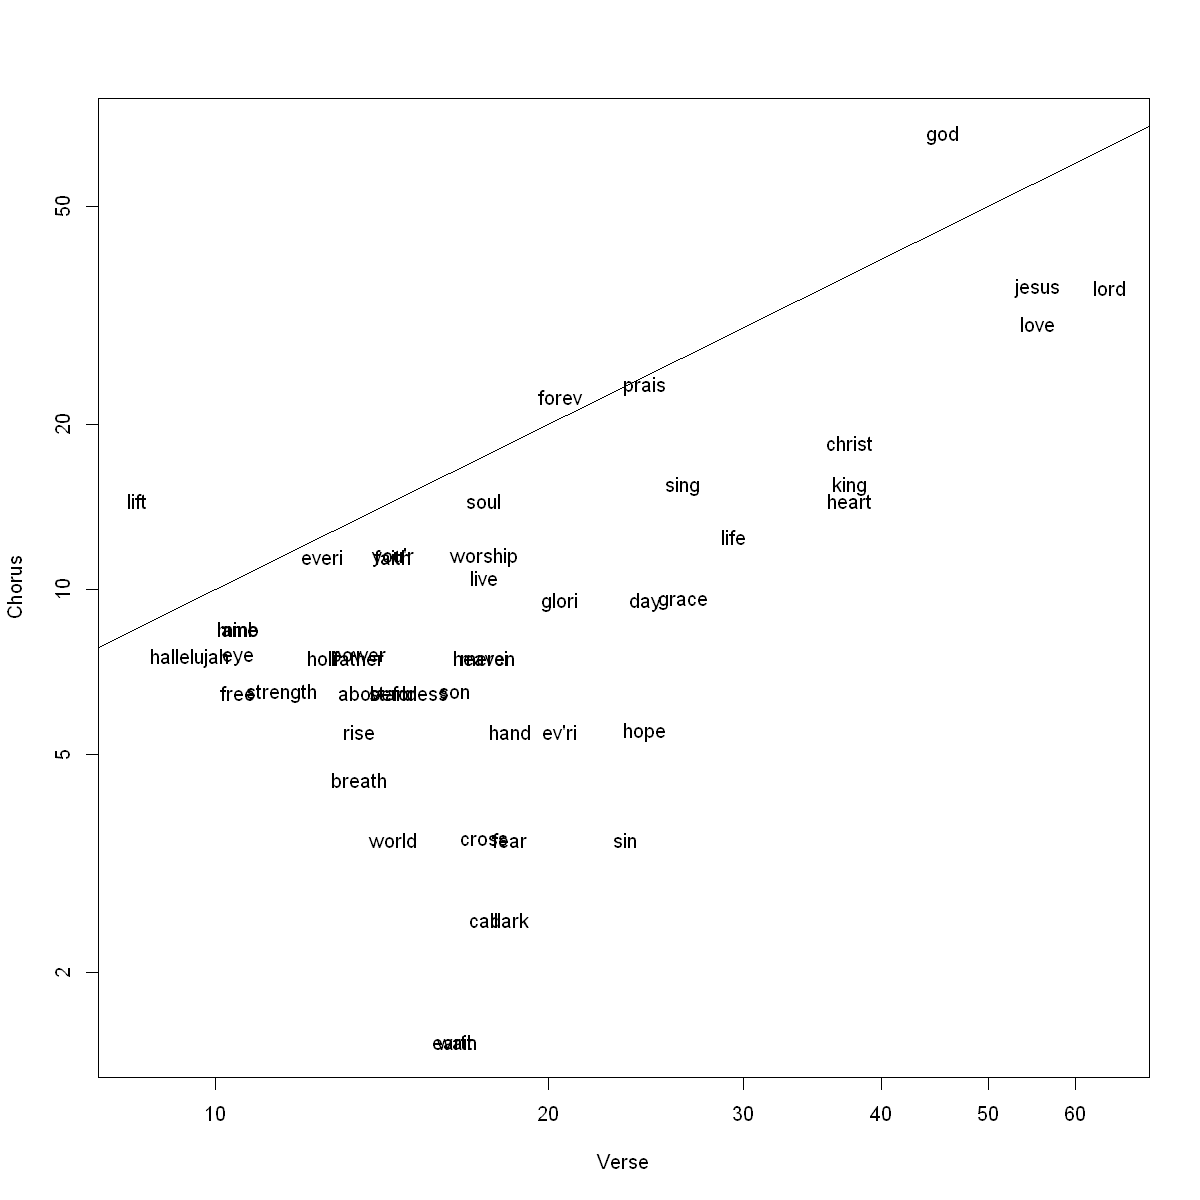

In [28]:
plot(selected$verse + 0.5, selected$chorus + 0.5, xlab='Verse', ylab='Chorus', log='xy', type='n')
text(selected$verse+0.5, selected$chorus+0.5, labels=selected$word)
abline(a=0, b=1)

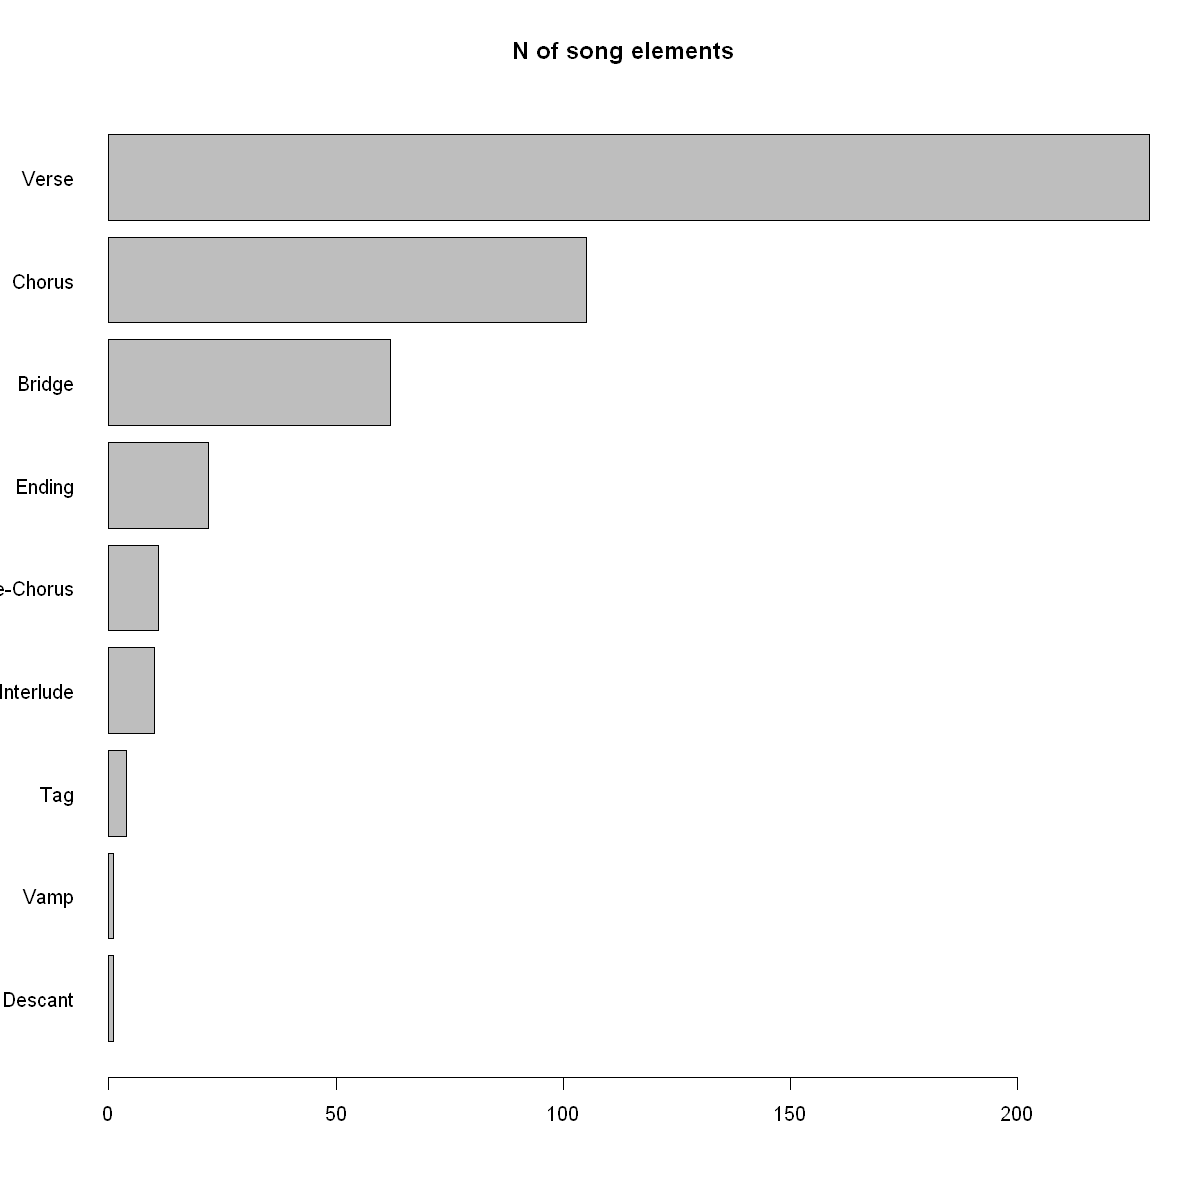

In [29]:
df %>% count(type) %>% 
    arrange(n) %>% 
    with(barplot(n, names.arg=type, horiz=T, las=1, main='N of song elements'))

In [30]:
merged['verse_p'] = merged$verse / sum(merged$verse)
merged['chorus_p'] = merged$chorus / sum(merged$chorus)

In [31]:
merged

word,verse,chorus,total,verse_p,chorus_p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
abandon,0,1,1,0.0000000000,0.0008960573
abid,1,0,1,0.0003492840,0.0000000000
abl,1,3,4,0.0003492840,0.0026881720
abound,2,0,2,0.0006985679,0.0000000000
abov,13,6,19,0.0045406916,0.0053763441
abund,1,0,1,0.0003492840,0.0000000000
accept,1,0,1,0.0003492840,0.0000000000
acclaim,1,0,1,0.0003492840,0.0000000000
acclam,1,0,1,0.0003492840,0.0000000000


In [32]:
selected = merged %>% filter(total > 20)

In [33]:
selected

word,verse,chorus,total,verse_p,chorus_p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bless,15,6,21,0.005239260,0.005376344
christ,37,18,55,0.012923507,0.016129032
day,24,9,33,0.008382815,0.008064516
ev'ri,20,5,25,0.006985679,0.004480287
everi,12,11,23,0.004191408,0.009856631
faith,14,11,25,0.004889976,0.009856631
fear,18,3,21,0.006287111,0.002688172
forev,20,22,42,0.006985679,0.019713262
glori,20,9,29,0.006985679,0.008064516


In [34]:
max_p = max(selected$verse_p, selected$chorus_p)

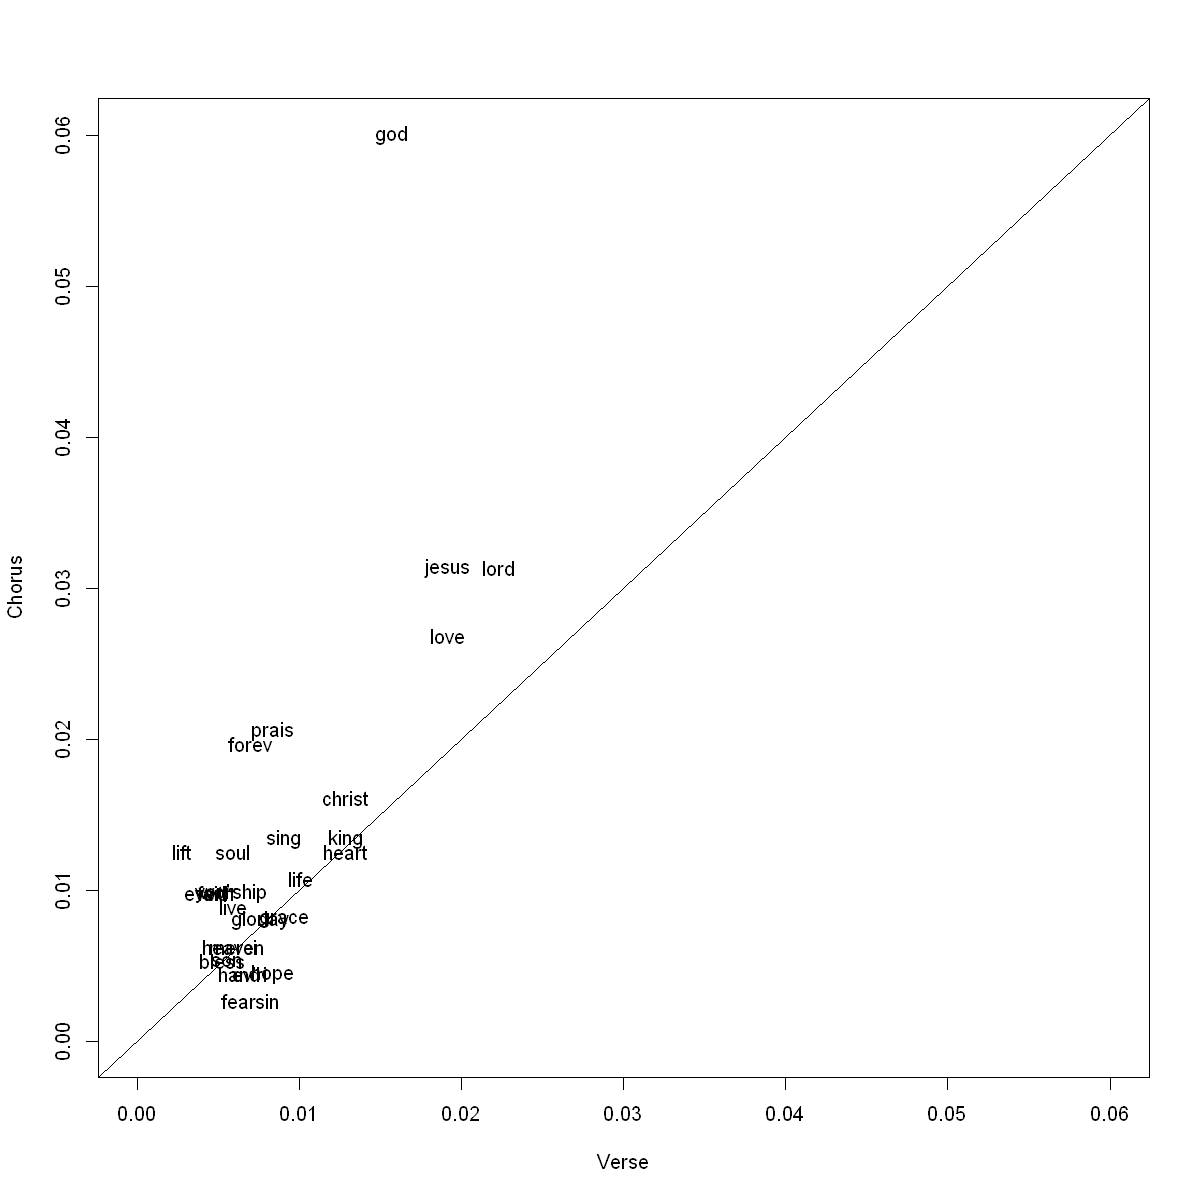

In [35]:
plot(selected$verse_p, selected$chorus_p, xlab='Verse', ylab='Chorus', xlim=c(0,max_p), ylim=c(0,max_p), type='n')
text(selected$verse_p, selected$chorus_p, labels=selected$word)
abline(a=0, b=1)

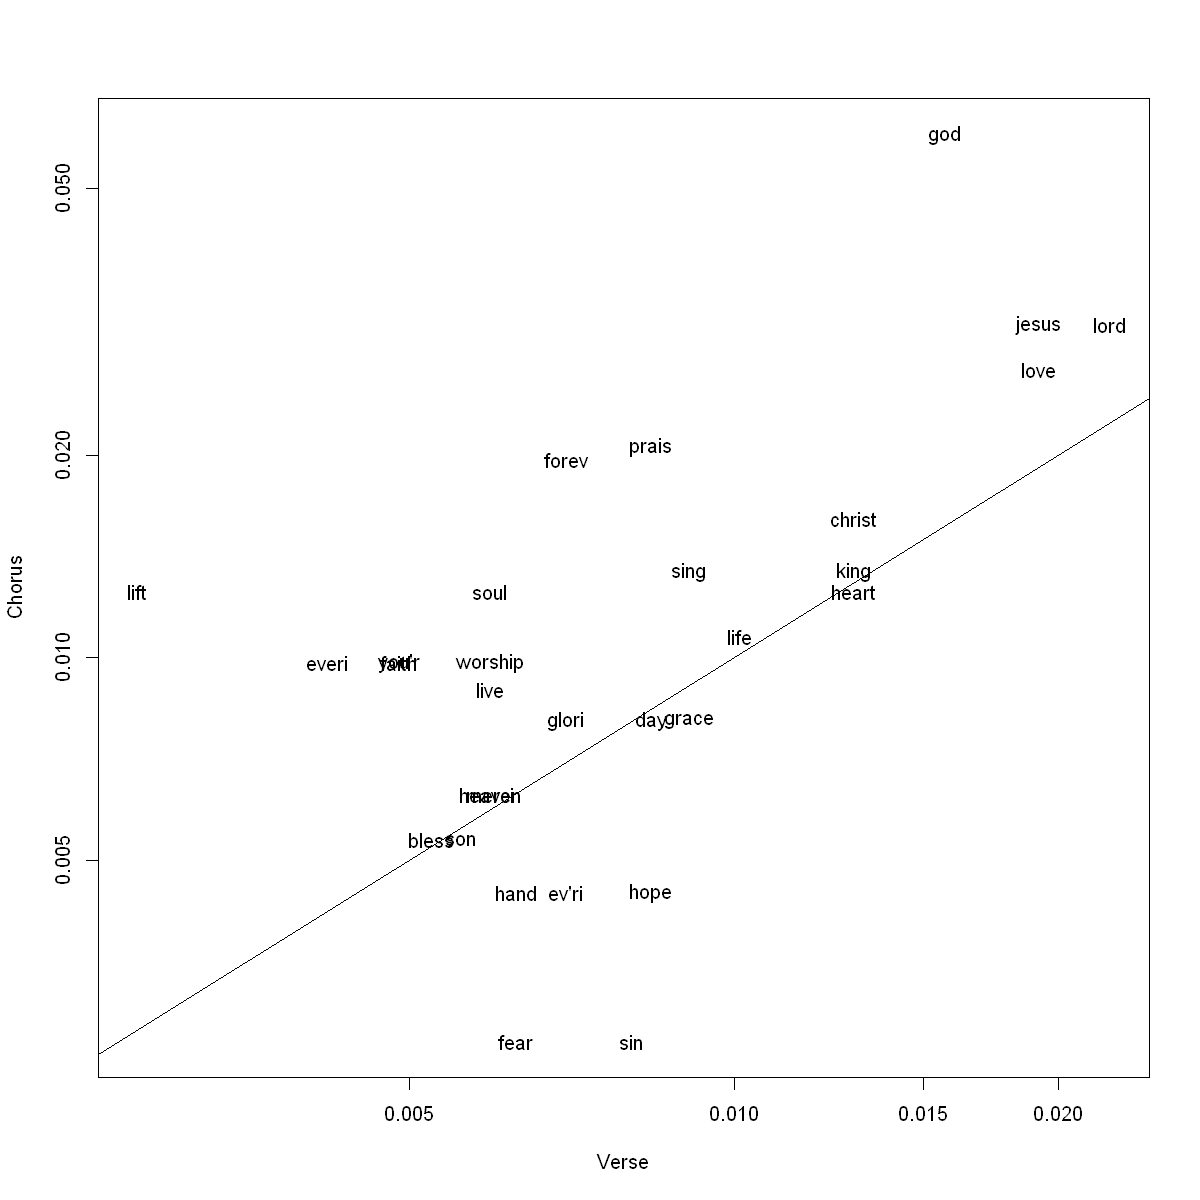

In [36]:
plot(selected$verse_p, selected$chorus_p, xlab='Verse', ylab='Chorus', log='xy', type='n')
text(selected$verse_p, selected$chorus_p, labels=selected$word)
abline(a=0, b=1)

## Odds Ratio(OR)


$$
OR=\frac{a/c}{b/d}=\frac{ad}{bc}
$$


| _ | case | non-case |
| ---: | :---: | :---: |
| target | ***a*** | ***b*** |
| reference | ***c*** | ***d*** |

a: target, case = (number of occurence in target)

b: target, non-case = n(target) - a

c: reference, case = (number of occurence in reference)

d: reference, non-case = n(reference) - d

\* To avoid zero-divide error, add 0.5 to each cell (Huldane-Anscomb correction)


In [37]:
# chorus(target) vs. verse(reference)
a = merged$chorus + 0.5
b = sum(merged$chorus) - merged$chorus + 0.5
c = merged$verse + 0.5
d = sum(merged$verse) - merged$verse + 0.5



merged['odds_ratio'] = (a*d) / (b * c)
merged['log_OR'] = merged['odds_ratio']  %>% log()


In [38]:
top = merged %>% filter(total > 10) %>% arrange(desc(odds_ratio)) %>% head(20)
bottom = merged %>% filter(total > 10) %>% arrange(desc(odds_ratio)) %>% tail(20)
binded = rbind(top, bottom)

In [ ]:
# selected = merged %>% filter(total > 10)

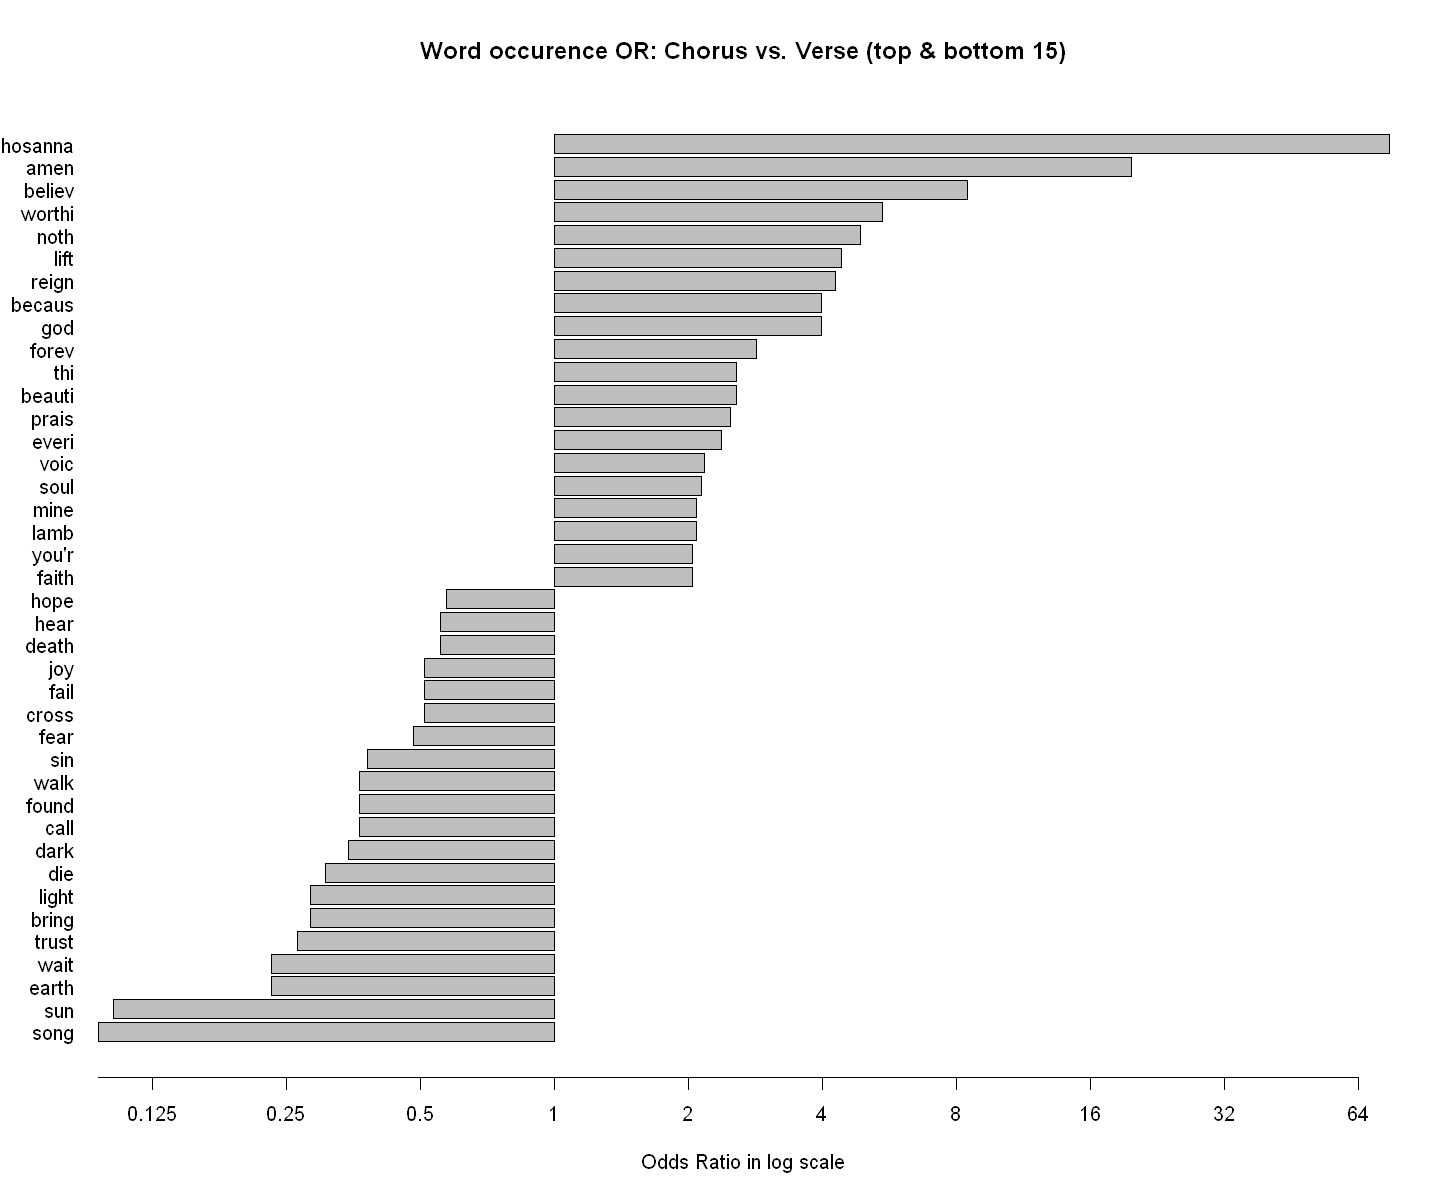

In [39]:
options(repr.plot.width=12, repr.plot.height=10)
par(cex=1)
v_min = floor(min(binded$log_OR)) - 1
v_max = ceiling(max(binded$log_OR)) + 1

binded %>% 
    arrange(log_OR) %>%
    with(barplot(log_OR, names.arg=word, horiz=T, las=1, main='Word occurence OR: Chorus vs. Verse (top & bottom 15)', xlab='Odds Ratio in log scale', xaxt='n'))

axis(1, at=(v_min:v_max)*log(2), labels=2^(v_min:v_max))

In [ ]:
# binded %>% 
    # with(barplot(odds_ratio, names.arg=word, horiz=T, las=1, main='Word occurence OR: Chorus vs. Verse (top & bottom 15)', xlab='Odds Ratio in log scale', log='x'))
